<a href="https://colab.research.google.com/github/KimJisanER/Automation_toyrent/blob/main/0221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
!pip install causal-conv1d>=1.1.0 -q -U
!pip install mamba-ssm -q -U
!git clone https://github.com/state-spaces/mamba.git
%cd mamba
!echo "/usr/lib64-nvidia/" | sudo tee -a /etc/ld.so.conf.d/libcuda.conf
!ldconfig

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00
Cloning into 'mamba'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 237 (delta 76), reused 68 (delta 68), pack-reused 129
Receiving objects: 100% (237/237), 499.22 KiB | 2.46 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/mamba
/usr/lib64-nvidia/
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link



In [4]:
df = pd.read_pickle("/content/drive/MyDrive/Class_A_df_0219")

In [5]:
df

,chembl_id,pChEMBL_value_Ki,Fingerprint,accession,sequence
0,CHEMBL104593,9.44,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",P19327,___TFSYQVITSLLTLIAVVAISLQNVANLITDMVSVLVLPMAALY...
1,CHEMBL105926,6.83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,___TFSYQVITSLLTLIAVVAISLQNVANLITDMVSVLVLPMAALY...
2,CHEMBL108026,7.46,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,___TFSYQVITSLLTLIAVVAISLQNVANLITDMVSVLVLPMAALY...
3,CHEMBL1086958,8.21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,___TFSYQVITSLLTLIAVVAISLQNVANLITDMVSVLVLPMAALY...
4,CHEMBL1086959,6.85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,___TFSYQVITSLLTLIAVVAISLQNVANLITDMVSVLVLPMAALY...
...,...,...,...,...,...
114525,CHEMBL67464,7.68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P47936,___SSGQQIAVALCLMGSAVIIRLRKPSYFIADLASV-IFACNFVI...
114526,CHEMBL68641,8.72,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",P47936,___SSGQQIAVALCLMGSAVIIRLRKPSYFIADLASV-IFACNFVI...
114527,CHEMBL947,8.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P47936,___SSGQQIAVALCLMGSAVIIRLRKPSYFIADLASV-IFACNFVI...
114528,CHEMBL569766,8.15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q99527,EHQYVIGLFLSCYTFLFGFIVNEKMTIPDYFADILVA-DSLIEVFN...


In [6]:
def embed_sequence(sequence):

    blosum62_matrix = {
        'A': [4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
        'R': [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
        'N': [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3, 0, -2, -3, -2, 1, 0, -4, -2, -3],
        'D': [-2, -2, 1, 6, -3, 0, 2, -1, -1, -3, -4, -1, -3, -3, -1, 0, -1, -4, -3, -3],
        'C': [0, -3, -3, -3, 9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
        'Q': [-1, 1, 0, 0, -3, 5, 2, -2, 0, -3, -2, 1, 0, -3, -1, 0, -1, -2, -1, -2],
        'E': [-1, 0, 0, 2, -4, 2, 5, -2, 0, -3, -3, 1, -2, -3, -1, 0, -1, -3, -2, -2],
        'G': [0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2, -3, -3, -2, 0, -2, -2, -3, -3],
        'H': [-2, 0, 1, -1, -3, 0, 0, -2, 8, -3, -3, -1, -2, -1, -2, -1, -2, -2, 2, -3],
        'I': [-1, -3, -3, -3, -1, -3, -3, -4, -3, 4, 2, -3, 1, 0, -3, -2, -1, -3, -1, 3],
        'L': [-1, -2, -3, -4, -1, -2, -3, -4, -3, 2, 4, -2, 2, 0, -3, -2, -1, -2, -1, 1],
        'K': [-1, 2, 0, -1, -3, 1, 1, -2, -1, -3, -2, 5, -1, -3, -1, 0, -1, -3, -2, -2],
        'M': [-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1, 5, 0, -2, -1, -1, -1, -1, 1],
        'F': [-2, -3, -3, -3, -2, -3, -3, -3, -1, 0, 0, -3, 0, 6, -4, -2, -2, 1, 3, -1],
        'P': [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4, 7, -1, -1, -4, -3, -2],
        'S': [1, -1, 1, 0, -1, 0, 0, 0, -1, -2, -2, 0, -1, -2, -1, 4, 1, -3, -2, -2],
        'T': [0, -1, 0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0],
        'W': [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1, 1, -4, -3, -2, 11, 2, -3],
        'Y': [-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -1, 3, -3, -2, -2, 2, 7, -1],
        'V': [0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2, 1, -1, -2, -2, 0, -3, -1, 4],
        'B': [-2, -1, 3, 4, -3, 0, 1, -1, 0, -3, -4, 0, -3, -3, -2, 0, -1, -4, -3, -3],
        'Z': [-1, 0, 0, 1, -3, 3, 4, -2, 0, -3, -3, 1, -1, -3, -1, 0, -1, -3, -2, -2],
        'X': [0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, 0, -2, -1, -1],
        '-': [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
        '_': [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
        '*': [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
    }

    embedding = np.zeros((len(sequence), len(blosum62_matrix['A'])))
    for i, amino_acid in enumerate(sequence):
        if amino_acid not in blosum62_matrix:
            raise ValueError("Invalid amino acid: " + amino_acid)
        embedding[i] = blosum62_matrix[amino_acid]

    return embedding

In [7]:
df['sequence'] = np.transpose(df['sequence'].apply(embed_sequence) + 5)/16

In [8]:
df

,chembl_id,pChEMBL_value_Ki,Fingerprint,accession,sequence
0,CHEMBL104593,9.44,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",P19327,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
1,CHEMBL105926,6.83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
2,CHEMBL108026,7.46,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
3,CHEMBL1086958,8.21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
4,CHEMBL1086959,6.85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P19327,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
...,...,...,...,...,...
114525,CHEMBL67464,7.68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P47936,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
114526,CHEMBL68641,8.72,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",P47936,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
114527,CHEMBL947,8.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P47936,"[[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.06..."
114528,CHEMBL569766,8.15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q99527,"[[0.25, 0.3125, 0.3125, 0.4375, 0.0625, 0.4375..."


In [9]:
df['sequence'][0].shape

(203, 20)

In [17]:
import torch
import torch.nn as nn
from mamba_ssm import Mamba


class UVMB(nn.Module):
    def __init__(self,c=1,w=203,h=20):
        super().__init__()
        self.convb  = nn.Sequential(
                    nn.Conv2d(in_channels=c, out_channels=16, kernel_size=3, stride=1, padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=16, out_channels=c, kernel_size=3, stride=1, padding=1)
                        )
        self.model1 = Mamba(
    # This module uses roughly 3 * expand * d_model^2 parameters
            d_model=c, # Model dimension d_model
            d_state=16,  # SSM state expansion factor
            d_conv=4,    # Local convolution width
            expand=2,    # Block expansion factor
        )

        self.model2 = Mamba(
            # This module uses roughly 3 * expand * d_model^2 parameters
            d_model=c, # Model dimension d_model
            d_state=16,  # SSM state expansion factor
            d_conv=4,    # Local convolution width
            expand=2,    # Block expansion factor
        )

        self.model3 = Mamba(
            # This module uses roughly 3 * expand * d_model^2 parameters
            d_model=w*h, # Model dimension d_model
            d_state=16,  # SSM state expansion factor
            d_conv=4,    # Local convolution width
            expand=2,    # Block expansion factor
        )
        self.smooth = nn.Conv2d(in_channels=c, out_channels=c, kernel_size=3, stride=1, padding=1)
        self.ln = nn.LayerNorm(normalized_shape=c)
        self.softmax = nn.Softmax()
    def forward(self, x):
        b,c,w,h = x.shape
        x = self.convb(x) + x
        x = self.ln(x.reshape(b, -1, c))
        y = self.model1(x).permute(0, 2, 1)
        z = self.model3(y).permute(0, 2, 1)
        att = self.softmax(self.model2(x))
        result = att * z
        output = result.reshape(b, c, w, h)
        return self.smooth(output)

In [19]:
uvmb = UVMB(c=1, w=203, h=20).to('cuda')

In [12]:
import torch
import numpy as np
from torch.utils.data import Dataset

class ChemiDataset(Dataset):
    def __init__(self, df, is_train=False):
        self.is_train = is_train
        self.fingerprint = df['Fingerprint'].values  # Assuming 'Smiles' column holds input1
        self.sequences = df['sequence'].values  # New: for input2
        if not self.is_train:
            self.labels = df['pChEMBL_value_Ki'].values  # Labels are only relevant for training/validation

    def __len__(self):
        return len(self.fingerprint)

    def __getitem__(self, item):
      # Directly using the data without tokenization
      input1 = self.sequences[item].reshape(1, 203, 20)
      input2 = self.fingerprint[item]  # Directly using the sequence data

      label = np.array([])
      if not self.is_train:
          # Assuming you have a function to create labels or you can directly use them as they are
          label = np.array([self.labels[item]], dtype=np.float32)

      # Convert input1 and input2 to tensors if necessary
      # Example conversion (modify as needed based on your model's expected input format):
      input1 = torch.tensor(input1, dtype=torch.float32)  # Modify dtype as necessary
      input2 = torch.tensor(input2, dtype=torch.float32)  # Modify dtype as necessary

      return input1, input2, label

In [13]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state =42)
train, validation = train_test_split(train, test_size=0.1, shuffle=True, random_state =42)

In [14]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import BertModel, BertTokenizer
import re
import torch
from tqdm.auto import tqdm  # 진행률 표시줄을 위한 tqdm

train_dataset = ChemiDataset(train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, drop_last=True)

test_dataset = ChemiDataset(test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

validation_dataset = ChemiDataset(validation)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, drop_last=True)

# train_loader로부터 배치를 가져와서 확인
for batch in train_loader:
    input1, input2, target = batch

    # input1과 input2의 shape 확인
    print("input1의 shape:", input1.shape)
    print("input2의 shape:", input2.shape)

    # 필요한 경우 루프를 빠져나갈 수 있습니다.
    break

input1의 shape: torch.Size([32, 1, 203, 20])
input2의 shape: torch.Size([32, 2048])


In [20]:
x = df['sequence'][0]
output = uvmb(input1.to("cuda"))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [22]:
output[0]

tensor([[[0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670],
         [0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670],
         [0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670],
         ...,
         [0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670],
         [0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670],
         [0.1670, 0.1670, 0.1670,  ..., 0.1670, 0.1670, 0.1670]]],
       device='cuda:0', grad_fn=<SelectBackward0>)

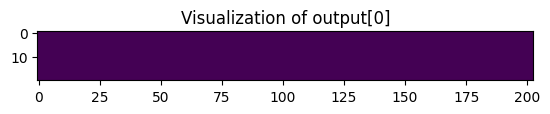

In [29]:
import numpy as np

# output 텐서를 CPU로 이동
output_cpu = output[0].to('cpu').detach().numpy()
output_cpu = output_cpu.reshape(20,203)

# 시각화
plt.imshow(output_cpu)
plt.title('Visualization of output[0]')
plt.show()

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiModal(nn.Module):
    def __init__(self, c=1, w=203, h=20, bit_input_shape=(2048, 1)):
        super().__init__()

        # Image path
        self.convb1 = nn.Conv2d(in_channels=c, out_channels=64, kernel_size=3, stride=1, padding=1)  # padding='same'
        self.convb2 = nn.Conv2d(in_channels=c, out_channels=64, kernel_size=5, stride=1, padding=2)  # padding='same'
        self.convb3 = nn.Conv2d(in_channels=c, out_channels=64, kernel_size=7, stride=1, padding=3)  # padding='same'

        self.convb11 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.convb22 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.convb33 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=7, stride=1, padding=3)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

        # Fully connected layers for image path
        self.fc_img = nn.Sequential(
            nn.Linear(128 * ((w // 4) * (h // 4)) * 3, 256),  # Adjusted for three concatenated flattened paths
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128)
        )

        # Bit input path
        bit_dim = bit_input_shape[0] * bit_input_shape[1]  # Flattened bit input size
        self.fc_bit = nn.Linear(bit_dim, 128)  # Assuming bit input also ends up with 128 features

        # Merged path
        self.fc_merged = nn.Sequential(
            nn.Linear(256, 512),  # Merging 128 from image and 128 from bit
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128)
        )

        # Output layer
        self.out = nn.Linear(128, 1)  # Final regression output

    def forward(self, image_input, bit_input):

        # Image path
        x1 = F.relu(self.convb1(image_input))
        x2 = F.relu(self.convb2(image_input))
        x3 = F.relu(self.convb3(image_input))

        x1 = self.maxpool(x1)
        x2 = self.maxpool(x2)
        x3 = self.maxpool(x3)

        x1 = F.relu(self.convb11(x1))
        x2 = F.relu(self.convb22(x2))
        x3 = F.relu(self.convb33(x3))

        x1 = self.maxpool(x1)
        x2 = self.maxpool(x2)
        x3 = self.maxpool(x3)

        x1 = self.flatten(x1)
        x2 = self.flatten(x2)
        x3 = self.flatten(x3)

        x1 = torch.cat((x1, x2, x3), dim=1)  # Concatenate along the feature dimension
        x1 = self.fc_img(x1)

        # Bit input path
        x2 = self.flatten(bit_input)
        x2 = self.fc_bit(x2)

        # Merge paths
        merged = torch.cat((x1, x2), dim=1)
        merged = self.fc_merged(merged)

        # Output
        output = self.out(merged)
        return output

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import os



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiModal().to(device)  # MultiModal 클래스 인스턴스 생성 및 디바이스 할당
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

best_val_loss = float('inf')
save_path = '/content/drive/MyDrive/HTR_only_model/best_model.pth'

for epoch in range(100):  # 100 에폭 동안 학습
    model.train()
    for input1, input2, targets in train_loader:
        input1, input2, targets = input1.to(device), input2.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(input1, input2)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for input1, input2,  targets in validation_loader:
            input1, input2,  targets = input1.to(device), input2.to(device), targets.to(device)
            outputs = model(input1, input2)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(validation_loader)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), save_path)
        print(f"Best model saved at Epoch {epoch+1} with Val Loss: {val_loss}")


Epoch 1, Val Loss: 1.0166325164841605
Best model saved at Epoch 1 with Val Loss: 1.0166325164841605
Epoch 2, Val Loss: 1.4832619286917306
Epoch 3, Val Loss: 0.8372849281226005
Best model saved at Epoch 3 with Val Loss: 0.8372849281226005
Epoch 4, Val Loss: 0.7762352294855185
Best model saved at Epoch 4 with Val Loss: 0.7762352294855185
Epoch 5, Val Loss: 0.7405650619860296
Best model saved at Epoch 5 with Val Loss: 0.7405650619860296
Epoch 6, Val Loss: 0.6716533794061287
Best model saved at Epoch 6 with Val Loss: 0.6716533794061287
Epoch 7, Val Loss: 0.6844404802455769
Epoch 8, Val Loss: 0.7229175423825538
Epoch 9, Val Loss: 0.7467779248327642
Epoch 10, Val Loss: 0.6906910340685944
